# Directed Network

In [8]:
import pandas as pd
import numpy as np
import networkx as nx

df = pd.read_csv('./Data/pp_dep_2017_2019.csv', delimiter=';')
df

,HS6_i,HS6_j,f_ij,f_i,f_j,f,odds,pr_norm,link01,short_name_ENG_i,short_name_ENG_j
0,107111,106121,901,15723,3395,1189028,20.069737,0.905077,1,Fresh bread containing by,Wheat or meslin flour
1,107111,106140,769,15723,3072,1189028,18.930487,0.899651,1,Fresh bread containing by,"Bran, sharps and other re"
2,107112,106121,762,14496,3395,1189028,18.410225,0.896962,1,Cake and pastry products;,Wheat or meslin flour
3,251123,256220,665,13160,20715,1189028,2.900500,0.487245,1,Iron or steel equipment f,Metal parts (excluding tu
4,256210,256220,646,10228,20715,1189028,3.625342,0.567600,1,Turned metal parts for ta,Metal parts (excluding tu
...,...,...,...,...,...,...,...,...,...,...,...
243975,259316,275111,1,1486,547,1189028,1.462803,0.187917,1,Iron or steel hot-worked,Combined refrigerators-fr
243976,259313,275111,1,882,547,1189028,2.464542,0.422723,1,Endless bands for machine,Combined refrigerators-fr
243977,201462,181110,1,1976,473,1189028,1.272167,0.119783,1,Acetone,"Printed newspapers, journ"
243978,201464,181110,1,696,473,1189028,3.611783,0.566328,1,"Other organic compounds,","Printed newspapers, journ"


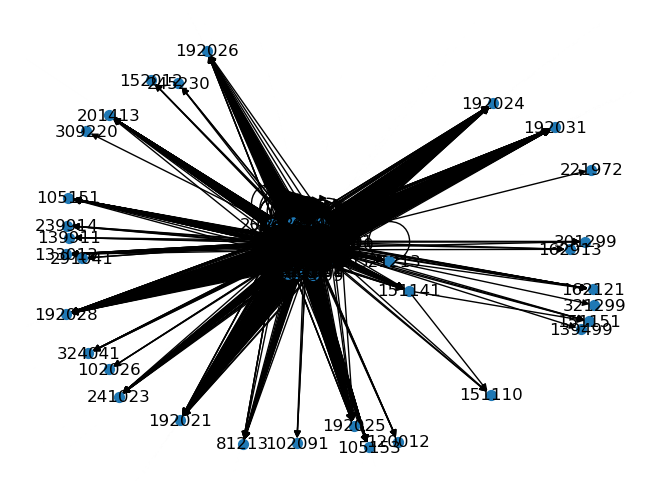

In [35]:
G = nx.DiGraph()

# Add the nodes

unique_product_codes = set(df['HS6_i']).union(set(df['HS6_j']))

G.add_nodes_from(unique_product_codes)

# Add the edges
for _, row in df.iterrows():
    product_i = row['HS6_i']
    product_j = row['HS6_j']
    weight = row['f_ij']
    G.add_edge(product_i, product_j, weight=weight)

nx.draw(G,node_size=50,with_labels=True)


In [51]:
import pandas as pd
import networkx as nx


# Load your data into a DataFrame
df = pd.read_csv('./Data/pp_dep_2017_2019.csv', delimiter=';')

G = nx.DiGraph()

# Add the nodes
unique_product_codes = set(df['short_name_ENG_i']).union(set(df['short_name_ENG_j']))
G.add_nodes_from(unique_product_codes)

# Add the edges
for _, row in df.iterrows():
    product_i = row['short_name_ENG_i']
    product_j = row['short_name_ENG_j']
    weight = row['f_ij']
    G.add_edge(product_i, product_j, weight=weight)


[node for node in G.nodes() if G.out_degree(node) > 0 ]
# Number of out-degree and in-degree only products
outdegree_only_products = [node for node in G.nodes() if G.out_degree(node) > 0 and G.in_degree(node) == 0]
indegree_only_products = [node for node in G.nodes() if G.in_degree(node) > 0 and G.out_degree(node) == 0]

# Calculate total number of nodes in the graph
total_nodes = len(G.nodes())

# Calculate number of out-degree only products
num_outdegree_only = len(outdegree_only_products)
# Calculate percentage of out-degree only products
percentage_outdegree_only = (num_outdegree_only / total_nodes) * 100

# Calculate number of in-degree only products
num_indegree_only = len(indegree_only_products)
# Calculate percentage of in-degree only products
percentage_indegree_only = (num_indegree_only / total_nodes) * 100

# Extract relevant variables for out-degree only products
outdegree_only_df = df[df['short_name_ENG_i'].isin(outdegree_only_products)]
outdegree_only_df = outdegree_only_df[['HS6_i', 'short_name_ENG_i']].drop_duplicates()
outdegree_only_df.columns = ['HS6', 'short_name_ENG']

# Extract relevant variables for in-degree only products
indegree_only_df = df[df['short_name_ENG_j'].isin(indegree_only_products)]
indegree_only_df = indegree_only_df[['HS6_j', 'short_name_ENG_j']].drop_duplicates()
indegree_only_df.columns = ['HS6', 'short_name_ENG']

# Save the results to CSV files
outdegree_only_df.to_csv('./Data/outdegree_only_products.csv', index=False)
indegree_only_df.to_csv('./Data/indegree_only_products.csv', index=False)

# Print the calculated statistics
print("Number of Out-degree Only Products:", num_outdegree_only)
print("Percentage of Out-degree Only Products: {:.2f}%".format(percentage_outdegree_only))
print("Number of In-degree Only Products:", num_indegree_only)
print("Percentage of In-degree Only Products: {:.2f}%".format(percentage_indegree_only))


Number of Out-degree Only Products: 26
Percentage of Out-degree Only Products: 2.31%
Number of In-degree Only Products: 26
Percentage of In-degree Only Products: 2.31%


Average in-degree: 176.54124457308248
Average out-degree: 176.54124457308248
Average total degree: 353.08248914616496


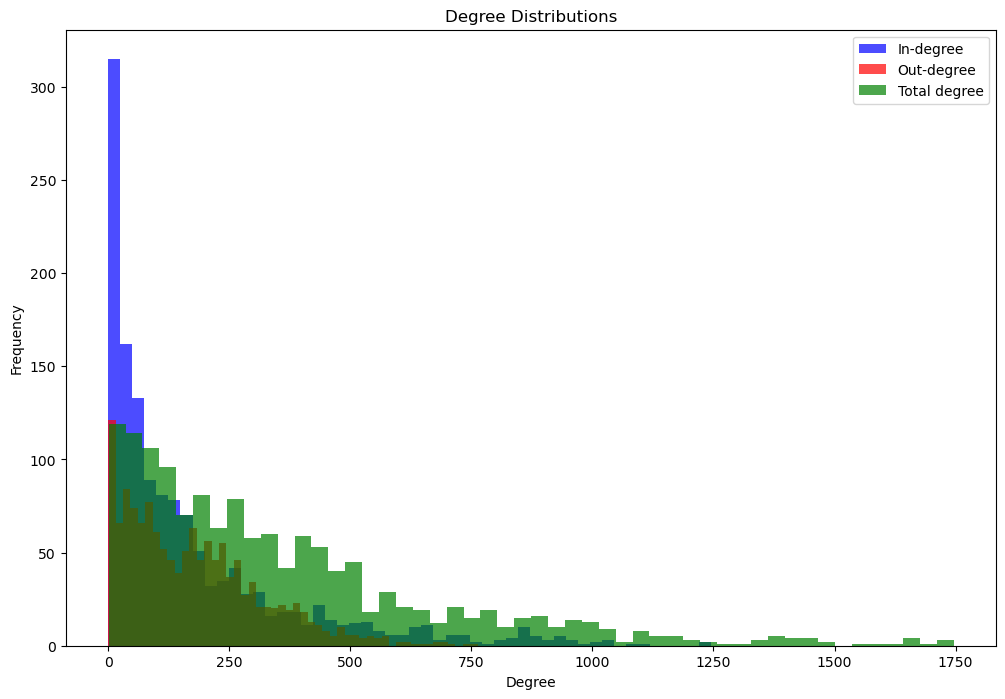

In [10]:


# Average degrees
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())
total_degrees = dict(G.degree())

# Average degrees
num_nodes = len(G.nodes)

average_in_degree = sum(in_degrees.values()) / num_nodes
average_out_degree = sum(out_degrees.values()) / num_nodes
average_total_degree = sum(total_degrees.values()) / num_nodes

print("Average in-degree:", average_in_degree)
print("Average out-degree:", average_out_degree)
print("Average total degree:", average_total_degree)

# Degree distributions
in_degree_sequence = [degree for node, degree in G.in_degree()]
out_degree_sequence = [degree for node, degree in G.out_degree()]
total_degree_sequence = [degree for node, degree in G.degree()]

# Plot degree distributions
plt.figure(figsize=(12, 8))
plt.hist(in_degree_sequence, bins=50, color='blue', alpha=0.7, label='In-degree')
plt.hist(out_degree_sequence, bins=50, color='red', alpha=0.7, label='Out-degree')
plt.hist(total_degree_sequence, bins=50, color='green', alpha=0.7, label='Total degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distributions')
plt.legend()
plt.show()


In [11]:
nx.number_weakly_connected_components(G)

1

# Density

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already created the directed graph G

# Density
density1 = nx.density(G)
print("Density:", density1)

# Identify isolated nodes
isolated_nodes = [node for node, degree in G.degree() if degree == 0]

# Remove isolated nodes
G.remove_nodes_from(isolated_nodes)

# Compute the largest weakly connected component
largest_weakly_connected_component_nodes = max(nx.weakly_connected_components(G), key=len)
largest_weakly_connected_component = G.subgraph(largest_weakly_connected_component_nodes)


density2 = nx.density(largest_weakly_connected_component)
print("Density_largest_connected_component:", density2)

Density: 0.1278358034562509
Density_largest_connected_component: 0.1278358034562509


# Degree

Average in-degree: 176.54124457308248
Average out-degree: 176.54124457308248
Average total degree: 353.08248914616496


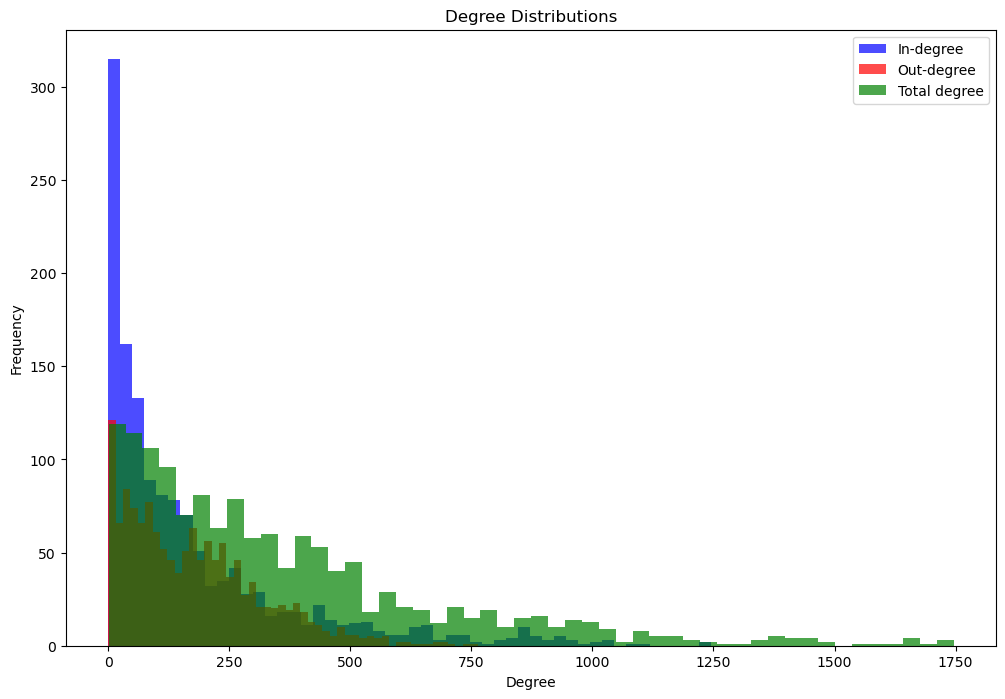

In [13]:


# Average degrees
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())
total_degrees = dict(G.degree())

# Average degrees
num_nodes = len(G.nodes)

average_in_degree = sum(in_degrees.values()) / num_nodes
average_out_degree = sum(out_degrees.values()) / num_nodes
average_total_degree = sum(total_degrees.values()) / num_nodes

print("Average in-degree:", average_in_degree)
print("Average out-degree:", average_out_degree)
print("Average total degree:", average_total_degree)

# Degree distributions
in_degree_sequence = [degree for node, degree in G.in_degree()]
out_degree_sequence = [degree for node, degree in G.out_degree()]
total_degree_sequence = [degree for node, degree in G.degree()]

# Plot degree distributions
plt.figure(figsize=(12, 8))
plt.hist(in_degree_sequence, bins=50, color='blue', alpha=0.7, label='In-degree')
plt.hist(out_degree_sequence, bins=50, color='red', alpha=0.7, label='Out-degree')
plt.hist(total_degree_sequence, bins=50, color='green', alpha=0.7, label='Total degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distributions')
plt.legend()
plt.show()


# Maximum likelihood

Calculating best minimal value for power law fit


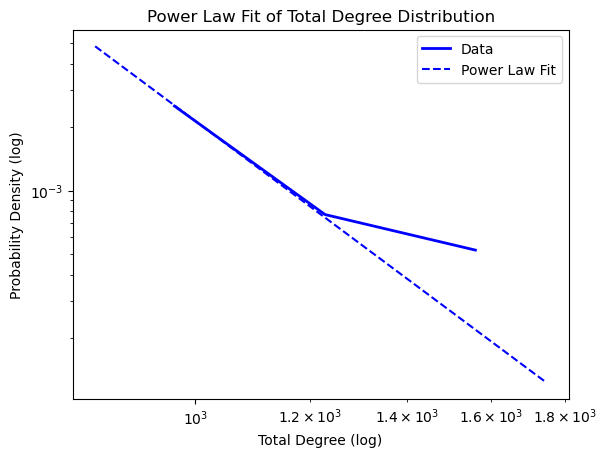

Alpha (scaling parameter): 5.120166391343056
Xmin (minimum value of the power law distribution): 853.0


In [14]:
import powerlaw

# Fit power law to the total degree distribution
fit = powerlaw.Fit(total_degree_sequence)

# Get the alpha (scaling parameter) and xmin (minimum value of the power law distribution)
alpha = fit.alpha
xmin = fit.xmin

# Plot the degree distribution and the power law fit
fig = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig)

# Visualize the data and the fit on a log-log scale
plt.xlabel('Total Degree (log)')
plt.ylabel('Probability Density (log)')
plt.title('Power Law Fit of Total Degree Distribution')
plt.legend(['Data', 'Power Law Fit'])
plt.show()

print("Alpha (scaling parameter):", alpha)
print("Xmin (minimum value of the power law distribution):", xmin)


In [15]:
As = nx.adjacency_matrix(G)
A =As.todense()
print(A)


[[0 0 0 ... 0 0 3]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 2]
 ...
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 2]]


In [16]:
d = nx.degree(G)
d = dict(d)

print("average degree: ", sum(d.values())/len(G.nodes))

average degree:  353.08248914616496


(0.0, 1900.0)

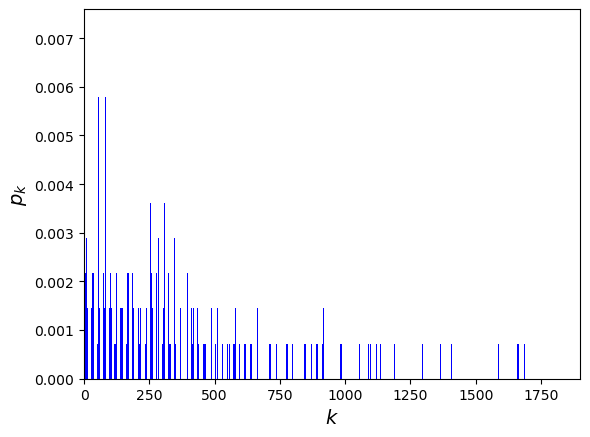

In [17]:
nx.degree_histogram(G)

import matplotlib.pyplot as plt
x = list(range(max(d.values())+1))
y = [i/len(G.nodes) for i in nx.degree_histogram(G)]
# print(x)
# print(y)

plt.bar(x, y, width=0.5, color="blue")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("$p_k$", fontsize=14)
plt.xlim([0,1900])

# Centrality

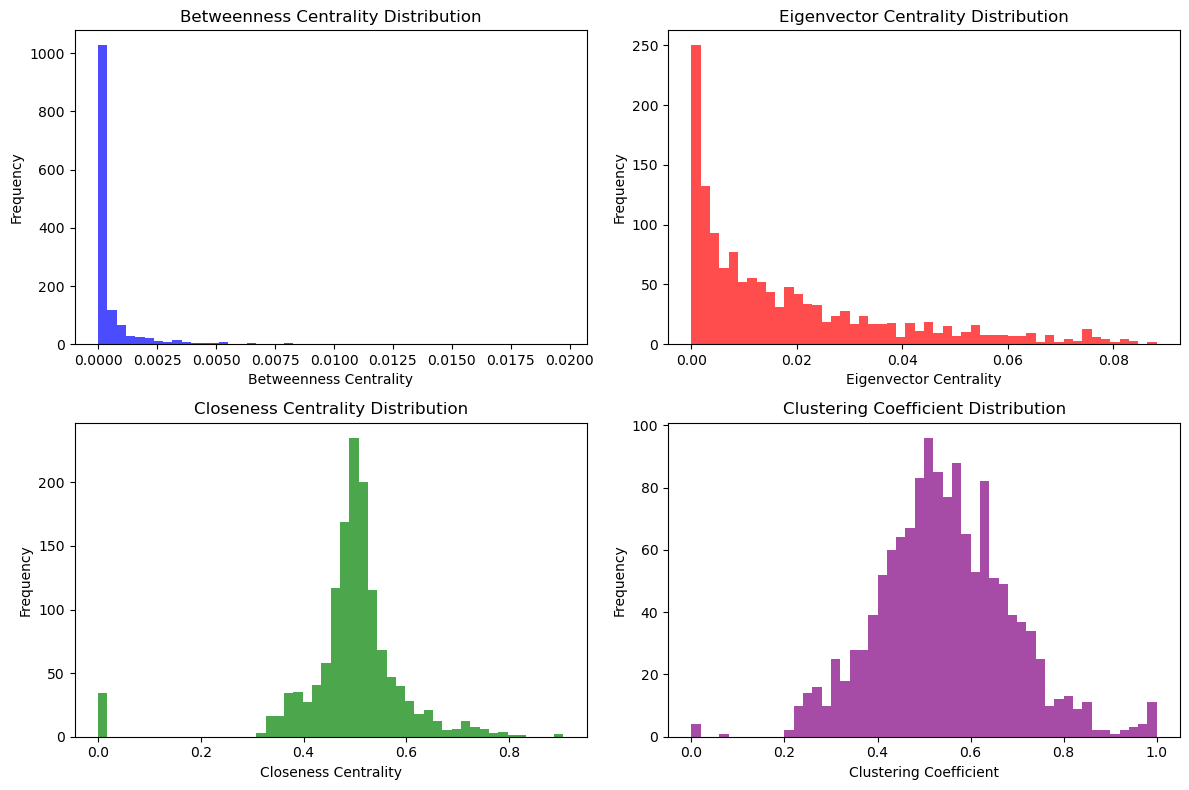

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already created the directed graph G

# Betweenness Centrality
betweenness = nx.betweenness_centrality(G)

# Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(G)

# Closeness Centrality
closeness = nx.closeness_centrality(G)

# Clustering Coefficient
clustering = nx.clustering(G)

# Plot distributions
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(list(betweenness.values()), bins=50, color='blue', alpha=0.7)
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(list(eigenvector.values()), bins=50, color='red', alpha=0.7)
plt.title('Eigenvector Centrality Distribution')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(list(closeness.values()), bins=50, color='green', alpha=0.7)
plt.title('Closeness Centrality Distribution')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(list(clustering.values()), bins=50, color='purple', alpha=0.7)
plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Path

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already created the directed graph G

# Identify isolated nodes
isolated_nodes = [node for node in G if G.degree(node) == 0]

# Remove isolated nodes
G.remove_nodes_from(isolated_nodes)

import networkx as nx

def average_shortest_path_length(graph):
    total_shortest_path_length = 0
    total_pairs = 0

    for source in graph.nodes():
        for target in graph.nodes():
            if source != target:
                try:
                    shortest_path_length = nx.shortest_path_length(graph, source=source, target=target)
                    total_shortest_path_length += shortest_path_length
                    total_pairs += 1
                except nx.NetworkXNoPath:
                    pass

    if total_pairs == 0:
        return float('nan')  # No pairs of nodes found

    return total_shortest_path_length / total_pairs

# Assuming you have already created the directed graph G
average_shortest_path = average_shortest_path_length(G)
print("Average Shortest Path Length:", average_shortest_path)


Average Shortest Path Length: 1.9736670440780637


In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already created the directed graph G

# Identify isolated nodes
isolated_nodes = [node for node, degree in G.degree() if degree == 0]

# Remove isolated nodes
G.remove_nodes_from(isolated_nodes)

# Compute the largest weakly connected component
largest_weakly_connected_component_nodes = max(nx.weakly_connected_components(G), key=len)
largest_weakly_connected_component = G.subgraph(largest_weakly_connected_component_nodes)

# Compute the efficiency of the largest weakly connected component
total_efficiency = 0
total_pairs = 0
for node in largest_weakly_connected_component:
    shortest_paths = nx.shortest_path_length(largest_weakly_connected_component, source=node)
    for target, length in shortest_paths.items():
        if length != 0:  # Exclude the node itself
            total_efficiency += 1 / length
            total_pairs += 1

average_efficiency = total_efficiency / total_pairs

print("Average Efficiency (Largest Weakly Connected Component):", average_efficiency)


Average Efficiency (Largest Weakly Connected Component): 0.5490051128094914


Average Shortest Path Length (Largest Connected Component): 1.8246839734205482
Longest Path Length: 4


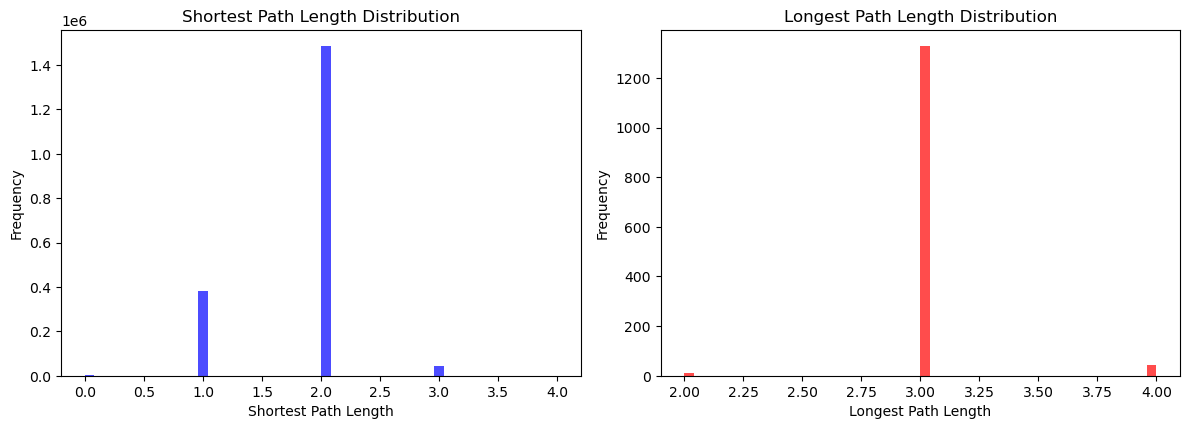

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already created the directed graph G
G = G.to_undirected()

# Get the largest connected component
largest_connected_component = max(nx.connected_components(G), key=len)

# Compute the average shortest path length for the largest connected component
average_shortest_path_length_largest_component = nx.average_shortest_path_length(G.subgraph(largest_connected_component))
print("Average Shortest Path Length (Largest Connected Component):", average_shortest_path_length_largest_component)

# Average/general longest path length
# Longest path length can be computed by finding the diameter of the largest connected component
longest_path_length = nx.diameter(G.subgraph(largest_connected_component))
print("Longest Path Length:", longest_path_length)

# Shortest path length distributions
all_shortest_paths = nx.shortest_path_length(G)
shortest_path_lengths = [length for node, lengths in all_shortest_paths for length in lengths.values() if node in largest_connected_component]

# Longest path length distributions
all_longest_paths = nx.all_pairs_shortest_path_length(G)
longest_path_lengths = [max(lengths.values()) for _, lengths in all_longest_paths if _ in largest_connected_component]

# Plot distributions
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(shortest_path_lengths, bins=50, color='blue', alpha=0.7)
plt.title('Shortest Path Length Distribution')
plt.xlabel('Shortest Path Length')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(longest_path_lengths, bins=50, color='red', alpha=0.7)
plt.title('Longest Path Length Distribution')
plt.xlabel('Longest Path Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [44]:
import pandas as pd
import networkx as nx

# Load your data into a DataFrame
df = pd.read_csv('./Data/pp_dep_2017_2019.csv', delimiter=';')

G = nx.DiGraph()

# Add the nodes
unique_product_codes = set(df['short_name_ENG_i']).union(set(df['short_name_ENG_j']))
G.add_nodes_from(unique_product_codes)

# Add the edges
for _, row in df.iterrows():
    product_i = row['short_name_ENG_i']
    product_j = row['short_name_ENG_j']
    weight = row['f_ij']
    G.add_edge(product_i, product_j, weight=weight)

# Get the largest strongly connected component
largest_strongly_connected_component = max(nx.strongly_connected_components(G), key=len)

# Find all shortest paths
shortest_paths = nx.all_pairs_shortest_path(G.subgraph(largest_strongly_connected_component))

# Find all longest paths
longest_paths = nx.all_pairs_shortest_path(G.subgraph(largest_strongly_connected_component))

# Initialize variables to store smallest and largest paths
smallest_paths = []
largest_paths = []

# Iterate over all shortest paths to find the smallest one with at least 2 nodes
smallest_length = float('inf')
for source, targets in shortest_paths:
    for target, path in targets.items():
        if len(path) >= 2:
            # Verify the direction of edges in the path
            if all(G.has_edge(path[i], path[i+1]) for i in range(len(path)-1)):
                path_length = len(path)
                if path_length < smallest_length:
                    smallest_length = path_length
                    smallest_paths = [(source, target, path)]
                elif path_length == smallest_length:
                    smallest_paths.append((source, target, path))

# Iterate over all longest paths to find the largest one in terms of number of nodes
largest_node_count = 0
for source, targets in longest_paths:
    for target, path in targets.items():
        # Verify the direction of edges in the path
        if all(G.has_edge(path[i], path[i+1]) for i in range(len(path)-1)):
            if len(path) > largest_node_count:
                largest_node_count = len(path)
                largest_paths = [(source, target, path)]
            elif len(path) == largest_node_count:
                largest_paths.append((source, target, path))

# Save dataframes to Excel file
with pd.ExcelWriter("Dependency_path_results_with_real_names_directed.xlsx") as writer:
    smallest_df = pd.DataFrame(smallest_paths, columns=["Source", "Target", "Path"])
    smallest_df.to_excel(writer, sheet_name="Smallest Paths", index=False)
    
    largest_df = pd.DataFrame(largest_paths, columns=["Source", "Target", "Path"])
    largest_df.to_excel(writer, sheet_name="Largest Paths", index=False)


In [47]:
import pandas as pd
import networkx as nx

# Load your data into a DataFrame
df = pd.read_csv('./Data/pp_dep_2017_2019.csv', delimiter=';')

G = nx.DiGraph()

# Add the nodes
unique_product_codes = set(df['short_name_ENG_i']).union(set(df['short_name_ENG_j']))
G.add_nodes_from(unique_product_codes)

# Add the edges
for _, row in df.iterrows():
    product_i = row['short_name_ENG_i']
    product_j = row['short_name_ENG_j']
    weight = row['f_ij']
    G.add_edge(product_i, product_j, weight=weight)

# Check the input and output degree of the node "Hot-rolled flat products"
node = "Hot-rolled flat products "
input_degree = G.in_degree(node)
output_degree = G.out_degree(node)

print(f"Input degree of '{node}': {input_degree}")
print(f"Output degree of '{node}': {output_degree}")


Input degree of 'Hot-rolled flat products ': 145
Output degree of 'Hot-rolled flat products ': 97


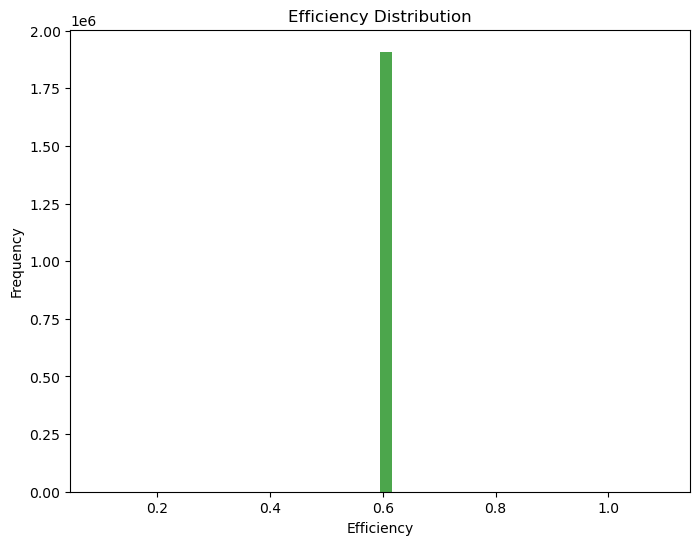

In [23]:
import networkx as nx
import matplotlib.pyplot as plt


G = G.to_directed()
def compute_efficiency(graph):
    total_efficiency = 0
    total_pairs = 0

    for node in graph:
        shortest_paths = nx.shortest_path_length(graph, source=node)
        for target, length in shortest_paths.items():
            if length != 0:  # Exclude the node itself
                total_efficiency += 1 / length
                total_pairs += 1

    if total_pairs == 0:
        return []

    return [total_efficiency / total_pairs] * total_pairs

# Assuming you have already created the directed graph G and computed the largest weakly connected component
largest_weakly_connected_component_nodes = max(nx.weakly_connected_components(G), key=len)
largest_weakly_connected_component = G.subgraph(largest_weakly_connected_component_nodes)

# Compute efficiency distribution
efficiency_values = compute_efficiency(largest_weakly_connected_component)

# Plot distribution
plt.figure(figsize=(8, 6))
plt.hist(efficiency_values, bins=50, color='green', alpha=0.7)
plt.title('Efficiency Distribution')
plt.xlabel('Efficiency')
plt.ylabel('Frequency')
plt.show()


In [24]:
import networkx as nx

# Assuming you have already created the directed graph G

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
highest_bc_product = max(betweenness_centrality, key=betweenness_centrality.get)
print("Product with Highest Betweenness Centrality:", highest_bc_product)

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
highest_ec_product = max(eigenvector_centrality, key=eigenvector_centrality.get)
print("Product with Highest Eigenvector Centrality:", highest_ec_product)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
highest_cc_product = max(closeness_centrality, key=closeness_centrality.get)
print("Product with Highest Closeness Centrality:", highest_cc_product)



Product with Highest Betweenness Centrality: 352310
Product with Highest Eigenvector Centrality: 351410
Product with Highest Closeness Centrality: 352310


In [25]:
import networkx as nx
import pandas as pd

# Assuming you have already created the directed graph G

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_ranked_products = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
eigenvector_ranked_products = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
closeness_ranked_products = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)

# Clustering Coefficient
clustering_coefficient = nx.clustering(G)
clustering_ranked_products = sorted(clustering_coefficient, key=clustering_coefficient.get, reverse=True)

# Create DataFrames for each centrality metric
betweenness_df = pd.DataFrame({
    'Rank': range(1, len(betweenness_ranked_products) + 1),
    'HS6_Code': betweenness_ranked_products,
    'Short_Name_ENG': [df.loc[df['HS6_i'] == product, 'short_name_ENG_i'].iloc[0] if product in df['HS6_i'].values
                       else df.loc[df['HS6_j'] == product, 'short_name_ENG_j'].iloc[0] for product in betweenness_ranked_products],
    'Betweenness_Centrality': [betweenness_centrality[product] for product in betweenness_ranked_products]
})

eigenvector_df = pd.DataFrame({
    'Rank': range(1, len(eigenvector_ranked_products) + 1),
    'HS6_Code': eigenvector_ranked_products,
    'Short_Name_ENG': [df.loc[df['HS6_i'] == product, 'short_name_ENG_i'].iloc[0] if product in df['HS6_i'].values
                       else df.loc[df['HS6_j'] == product, 'short_name_ENG_j'].iloc[0] for product in eigenvector_ranked_products],
    'Eigenvector_Centrality': [eigenvector_centrality[product] for product in eigenvector_ranked_products]
})

closeness_df = pd.DataFrame({
    'Rank': range(1, len(closeness_ranked_products) + 1),
    'HS6_Code': closeness_ranked_products,
    'Short_Name_ENG': [df.loc[df['HS6_i'] == product, 'short_name_ENG_i'].iloc[0] if product in df['HS6_i'].values
                       else df.loc[df['HS6_j'] == product, 'short_name_ENG_j'].iloc[0] for product in closeness_ranked_products],
    'Closeness_Centrality': [closeness_centrality[product] for product in closeness_ranked_products]
})

clustering_df = pd.DataFrame({
    'Rank': range(1, len(clustering_ranked_products) + 1),
    'HS6_Code': clustering_ranked_products,
    'Short_Name_ENG': [df.loc[df['HS6_i'] == product, 'short_name_ENG_i'].iloc[0] if product in df['HS6_i'].values
                       else df.loc[df['HS6_j'] == product, 'short_name_ENG_j'].iloc[0] for product in clustering_ranked_products],
    'Clustering_Coefficient': [clustering_coefficient[product] for product in clustering_ranked_products]
})

# Save DataFrames to Excel file with different sheet names
output_file = './Data/centrality_rankings_dependency.xlsx'  # Change the file name and path as needed
with pd.ExcelWriter(output_file) as writer:
    betweenness_df.to_excel(writer, sheet_name='Betweenness_Centrality', index=False)
    eigenvector_df.to_excel(writer, sheet_name='Eigenvector_Centrality', index=False)
    closeness_df.to_excel(writer, sheet_name='Closeness_Centrality', index=False)
    clustering_df.to_excel(writer, sheet_name='Clustering_Coefficient', index=False)


# Community detection

In [29]:
# import networkx as nx
# import community
# import matplotlib.pyplot as plt

# # Assuming you have already created the directed graph G
# # Example:
# # G = nx.DiGraph()
# # Add edges to the graph based on your data

# # Louvain algorithm
# partition_louvain = community.best_partition(G)
# print("Communities (Louvain):", partition_louvain)

# # Girvan-Newman algorithm
# communities_gn = nx.community.girvan_newman(G)
# best_partition_gn = next(communities_gn)
# print("Communities (Girvan-Newman):", best_partition_gn)

# # Clauset-Newman-Moore algorithm
# partition_cnm = community.greedy_modularity_communities(G)
# print("Communities (Clauset-Newman-Moore):", partition_cnm)

# # Drawing the graph with Louvain algorithm communities highlighted
# pos = nx.spring_layout(G)  # You can choose any layout
# plt.figure(figsize=(10, 8))
# nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.RdYlBu, node_color=list(partition_louvain.values()))
# nx.draw_networkx_edges(G, pos, alpha=0.3)
# plt.title("Graph with Louvain Algorithm Communities")
# plt.show()


# In/Out degree

In [31]:
import pandas as pd
import networkx as nx

# Load the CSV data
df = pd.read_csv('./Data/pp_dep_2017_2019.csv', delimiter=';')

G = G.to_directed()

# Number of out-degree and in-degree only products
outdegree_only_products = [node for node in G.nodes() if G.out_degree(node) > 0 and G.in_degree(node) == 0]
indegree_only_products = [node for node in G.nodes() if G.in_degree(node) > 0 and G.out_degree(node) == 0]

# Calculate total number of nodes in the graph
total_nodes = len(G.nodes())

# Calculate number of out-degree only products
num_outdegree_only = len(outdegree_only_products)
# Calculate percentage of out-degree only products
percentage_outdegree_only = (num_outdegree_only / total_nodes) * 100

# Calculate number of in-degree only products
num_indegree_only = len(indegree_only_products)
# Calculate percentage of in-degree only products
percentage_indegree_only = (num_indegree_only / total_nodes) * 100

# Extract relevant variables for out-degree only products
outdegree_only_df = df[df['HS6_i'].isin(outdegree_only_products)]
outdegree_only_df = outdegree_only_df[['HS6_i', 'short_name_ENG_i']].drop_duplicates()
outdegree_only_df.columns = ['HS6', 'short_name_ENG']

# Extract relevant variables for in-degree only products
indegree_only_df = df[df['HS6_j'].isin(indegree_only_products)]
indegree_only_df = indegree_only_df[['HS6_j', 'short_name_ENG_j']].drop_duplicates()
indegree_only_df.columns = ['HS6', 'short_name_ENG']

# Save the results to CSV files
outdegree_only_df.to_csv('./Data/outdegree_only_products.csv', index=False)
indegree_only_df.to_csv('./Data/indegree_only_products.csv', index=False)

# Print the calculated statistics
print("Number of Out-degree Only Products:", num_outdegree_only)
print("Percentage of Out-degree Only Products: {:.2f}%".format(percentage_outdegree_only))
print("Number of In-degree Only Products:", num_indegree_only)
print("Percentage of In-degree Only Products: {:.2f}%".format(percentage_indegree_only))



Number of Out-degree Only Products: 0
Percentage of Out-degree Only Products: 0.00%
Number of In-degree Only Products: 0
Percentage of In-degree Only Products: 0.00%


# Small world

In [ ]:
import networkx as nx

def average_shortest_path_length(graph):
    shortest_path_lengths = []

    for source in graph.nodes():
        for target in graph.nodes():
            if source != target:
                try:
                    shortest_path_length = nx.shortest_path_length(graph, source=source, target=target)
                    shortest_path_lengths.append(shortest_path_length)
                except nx.NetworkXNoPath:
                    pass

    return sum(shortest_path_lengths) / len(shortest_path_lengths) if shortest_path_lengths else float('nan')

# Assuming you have already created the directed graph G

# Get the number of nodes and edges in the dependency network
num_nodes = len(G.nodes())
num_edges = len(G.edges())

# Calculate the edge probability for the ER random graph
p = num_edges / (num_nodes * (num_nodes - 1))

# Generate the equivalent ER random graph 10 times and compute the average shortest path length and clustering coefficient
avg_shortest_path_er_total = 0
clustering_coeff_er_total = 0
num_iterations = 100

for _ in range(num_iterations):
    er_graph = nx.erdos_renyi_graph(num_nodes, p)
    avg_shortest_path_er_total += average_shortest_path_length(er_graph)
    clustering_coeff_er_total += nx.average_clustering(er_graph)

avg_shortest_path_er_avg = avg_shortest_path_er_total / num_iterations
clustering_coeff_er_avg = clustering_coeff_er_total / num_iterations

# Print the average results
print("ER Random Graph (Average of 100 runs):")
print("- Average Shortest Path Length:", avg_shortest_path_er_avg)
print("- Clustering Coefficient:", clustering_coeff_er_avg)


ER Random Graph (Average of 100 runs):
- Average Shortest Path Length: 1.8721505316623888
- Clustering Coefficient: 0.12786586809761535


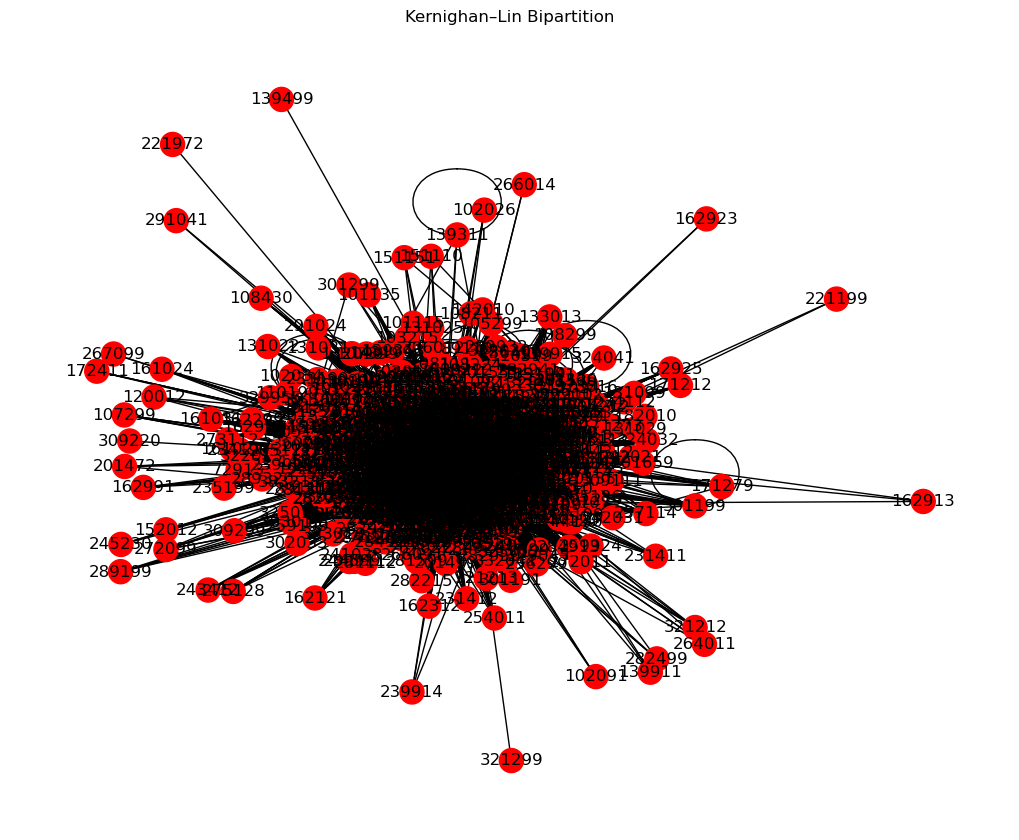

In [ ]:
import networkx as nx
import community
import matplotlib.pyplot as plt


import networkx as nx
import community
import matplotlib.pyplot as plt

# Assuming you have already created the directed graph G
# Example:
# G = nx.DiGraph()
# Add edges to the graph based on your data

# Convert G to undirected graph
G = G.to_undirected()


bipartition = nx.community.kernighan_lin_bisection(G)
colors = ['blue' if node in bipartition[0] else 'red' for node in G.nodes()]
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color=colors)
plt.title("Kernighan–Lin Bipartition")
plt.show()


# Community

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import community

# Modularity-based Communities (Greedy Modularity Maximization)
modularity_communities = list(nx.community.greedy_modularity_communities(G))
colors = [i for i in range(len(modularity_communities)) for _ in modularity_communities[i]]
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color=colors)
plt.title("Modularity-based Communities (Greedy Modularity Maximization)")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import community

# Label Propagation Community Detection
label_propagation_communities = list(nx.community.label_propagation_communities(G))
colors = [i for i in range(len(label_propagation_communities)) for _ in label_propagation_communities[i]]
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color=colors)
plt.title("Label Propagation Communities")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import community

# Louvain Community Detection Algorithm
louvain_partition = nx.community.best_partition(G)
colors = [louvain_partition[node] for node in G.nodes()]
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color=colors, cmap=plt.cm.Set1)
plt.title("Communities (Louvain)")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import community

# Fluid Communities Algorithm
k = 3  # Choose the number of communities to detect
fluid_communities = list(nx.community.asyn_fluidc(G, k))
colors = [i for i in range(len(fluid_communities)) for _ in fluid_communities[i]]
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color=colors)
plt.title("Fluid Communities (Asynchronous Fluid Communities)")
plt.show()
